In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv('../results/final/logmaps_res.csv')
means = df[df.length==60000].groupby('method')[['r']].median()
means = means.sort_values(by='r')
print(means)
cols = means.index.tolist()
print(df.columns)

               r
method          
Random  0.026184
SFA     0.137490
shRec   0.668460
ICA     0.691773
DCA     0.705110
PCA     0.716125
CCA     0.735530
DCCA    0.743515
ASOM    0.836409
Index(['data_id', 'r', 'duration', 'method', 'dataset', 'length'], dtype='object')


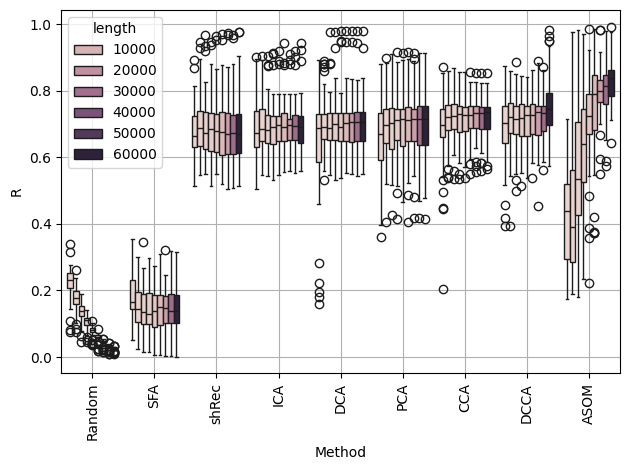

In [39]:
# figure about the 'r' values (same as previous)
plt.figure()
sns.boxplot(data=df, x='method', y='r', order=cols, hue='length')

# rotate xticklabels
plt.xticks(rotation=90)
# plt.yscale('log')

plt.ylabel('R')
plt.xlabel('Method')
plt.grid(True)
plt.tight_layout()
# plt.savefig('./notebooks/logmap_rs.png')
plt.show()

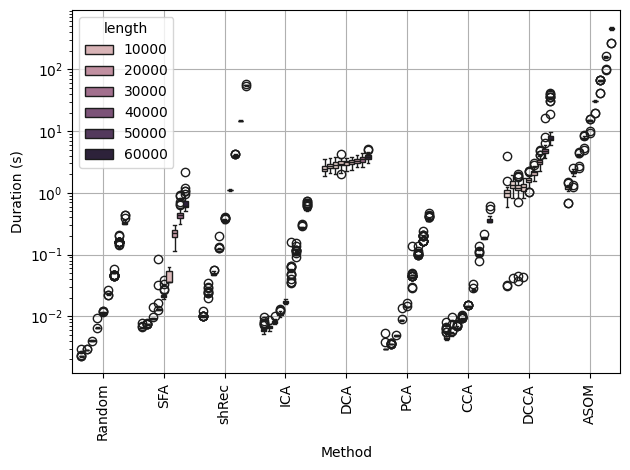

In [40]:

plt.figure()
sns.boxplot(data=df, x='method', y='duration', order=cols, hue='length')

# rotate xticklabels
plt.xticks(rotation=90)
plt.yscale('log')

plt.ylabel('Duration (s)')
plt.xlabel('Method')
plt.grid(True)
plt.tight_layout()
# plt.savefig('./notebooks/logmap_durations.png')
plt.show()



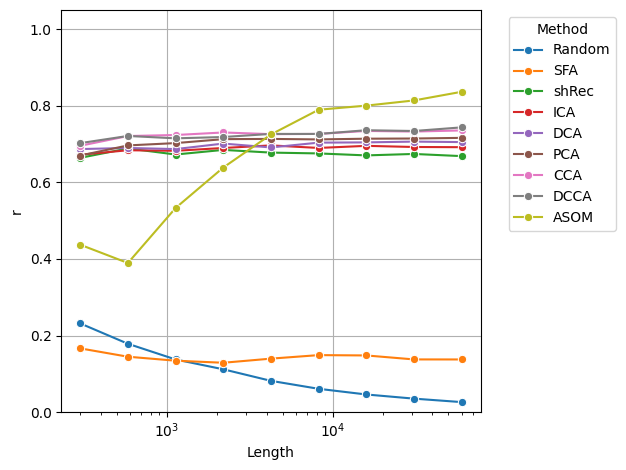

In [67]:
# making the times comparable by dividing the shortest median time per method
voi = 'r'

meds = df.groupby(['method', 'length'])[[voi]].median().reset_index()
# divide by the shortest median time per method
# meds[voi] = meds[voi] / meds.groupby('method')[voi].transform('min')

sns.lineplot(data=meds, x='length', y=voi, hue='method', palette='tab10', marker='o',
             hue_order=cols)
# plt.yscale('log')
plt.xscale('log')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel(voi)
plt.xlabel('Length')
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()

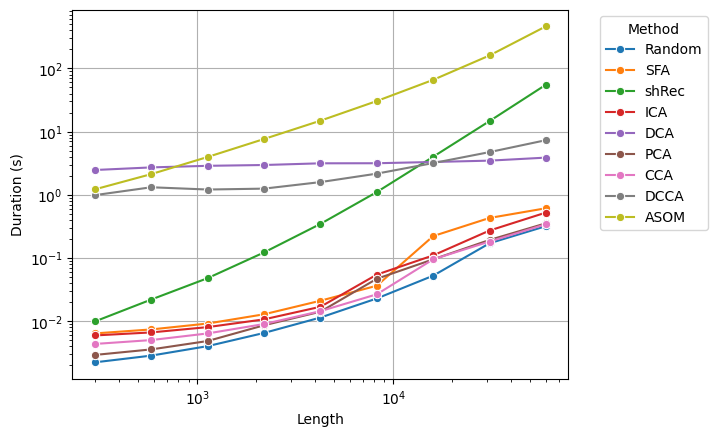

In [65]:
# making the times comparable by dividing the shortest median time per method
voi = 'duration'

meds = df.groupby(['method', 'length'])[[voi]].median().reset_index()
# divide by the shortest median time per method
# meds[voi] = meds[voi] / meds.groupby('method')[voi].transform('min')

sns.lineplot(data=meds, x='length', y=voi, hue='method', palette='tab10',
             marker='o', hue_order=cols)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Duration (s)')
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

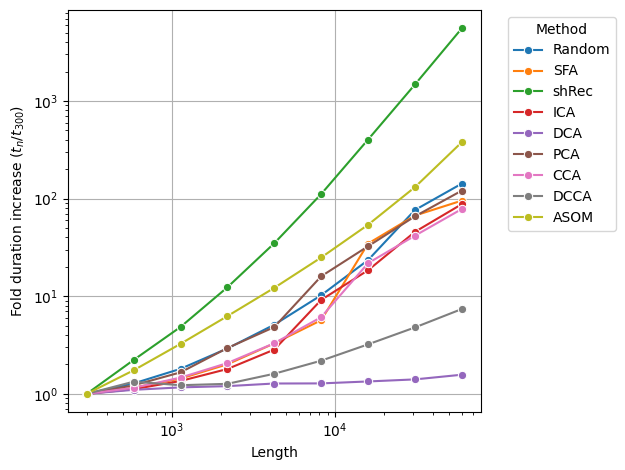

In [72]:
# making the times comparable by dividing the shortest median time per method
voi = 'duration'

meds = df.groupby(['method', 'length'])[[voi]].median().reset_index()
# divide by the shortest median time per method
meds[voi] = meds[voi] / meds.groupby('method')[voi].transform('min')

sns.lineplot(data=meds, x='length', y=voi, hue='method', palette='tab10',
             marker='o', hue_order=cols)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'Fold duration increase ($t_{n}/t_{300}$)')
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("relative_durations.png")

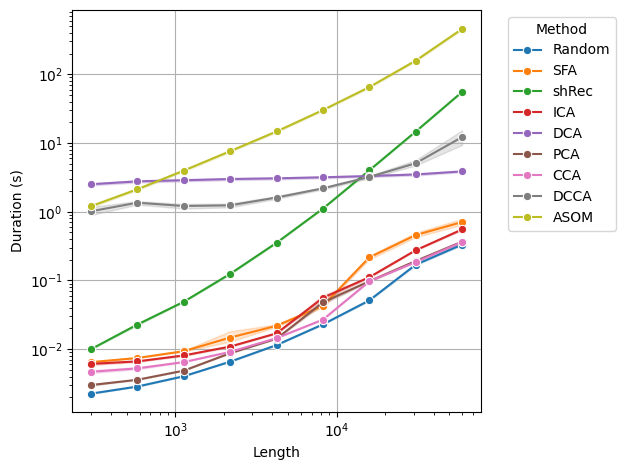

In [73]:
voi = 'duration'
plt.figure()
sns.lineplot(data=df, x='length', y=voi, hue='method', palette='tab10', marker='o', estimator='mean', errorbar=('ci', 95), hue_order=cols)
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Duration (s)")
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("durations.png")

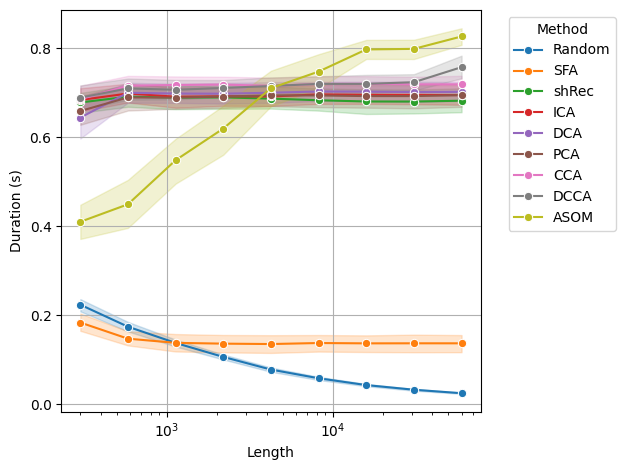

In [74]:
plt.figure()
sns.lineplot(data=df, x='length', y='r', hue='method', palette='tab10', 
             marker='o', estimator='mean', errorbar=('ci', 95), hue_order=cols)
# plt.yscale('log')
plt.xscale('log')
plt.ylabel("Duration (s)")
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("rs.png")